# 📚 Part 1 - Text data and known labels


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

💾 Read train dataset


In [166]:
dataset = pd.read_csv(r'data/emotions_dataset.txt', header=None, names= ['text', 'emotion'] ,delimiter=';')

display first five rows


In [167]:
dataset.head()

,text,emotion
0,i didnt feel humiliated,sad
1,i can go from feeling so hopeless to so damned...,sad
2,im grabbing a minute to post i feel greedy wrong,angry
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,angry


display last five rows


In [168]:
dataset.tail()

,text,emotion
19885,mmm i love you,love
19886,i'm sorry,sad
19887,"This salad dressing is okay, but not particula...",neutral
19888,I'm feeling pretty neutral about the current s...,neutral
19889,"This burrito is okay, but not particularly spicy.",neutral


display random ten rows


In [169]:
dataset.sample(10)

,text,emotion
17423,i feel a little like tom daley who was rightly...,happy
12255,i enjoyed today because hes a darling but its ...,fear
12750,i did feel very very heartbroken that i did no...,sad
18663,i just feel its one of those things you dont t...,love
2633,i feel that sweet pang and a desire for advent...,love
15701,Feeling excited is draining my energy,happy
6245,i feel love by sweet little arms wrapped aroun...,love
6874,ive always been feeling restless and dissatisf...,fear
13814,i am feeling afraid cos he isnt answering me a...,fear
12557,i started to feel rotten sore stomach sickness...,sad


## 🔍 Exploratory Data Analysis (EDA) for dataset_train

> The general idea of feature engineering: 

    + The better your domain knowledge on the data, the better your ability to engineer more features from it.
    + Feature engineering is a very large part of sentiment analysis in general.

In [170]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19890 entries, 0 to 19889
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     19890 non-null  object
 1   emotion  19890 non-null  object
dtypes: object(2)
memory usage: 310.9+ KB


shape (rows, cols)


In [171]:
print('There are {} rows and {} columns in train'.format(dataset.shape[0],dataset.shape[1]))

There are 19890 rows and 2 columns in train


describe data

In [172]:
dataset.describe()

,text,emotion
count,19890,19890
unique,18449,9
top,I wish I didn't feel fearful all the time,happy
freq,8,6259


Missing data


In [173]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

text       0
emotion    0
dtype: int64

we have 9 unique classes

In [174]:
labels= dataset['emotion'].unique()
labels

array(['sad', 'angry', 'love', 'surprise', 'fear', 'happy', 'disgusted',
       'neutral', 'excited'], dtype=object)

In [175]:
dataset.groupby('emotion').describe()

text                                                               
          count unique                                                top freq
emotion                                                                       
angry      2637   2636                        I'm fed up with feeling sad    2
disgusted   200    200               I don't see any reason to be fearful    1
excited     200    200          I'm not at all fearful like everyone else    1
fear       2362   2362  i feel as confused about life as a teenager or...    1
happy      6259   6258                        I'm so over being surprised    2
love       1464   1464  i am ever feeling nostalgic about the fireplac...    1
neutral     475    475                 I don't see any reason to be happy    1
sad        5454   5451                            I dislike feeling happy    2
surprise    839    839  ive been taking or milligrams or times recomme...    1

- Opps! `problem!' in balance between classes

> show imbalance between classes


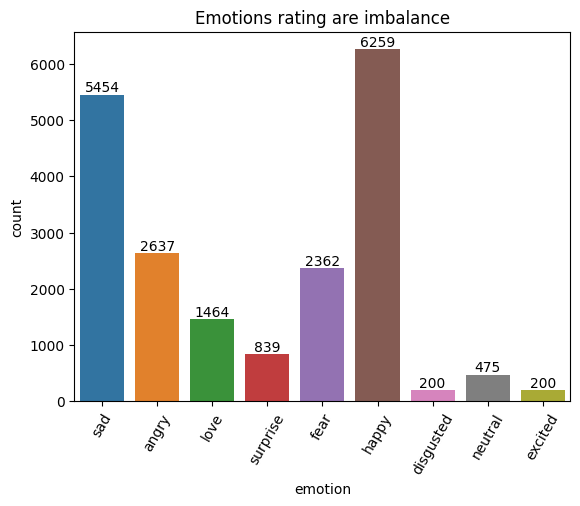

In [176]:
# plot
ax= sns.countplot(x=dataset['emotion'],
                  data=dataset)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Emotions rating are imbalance")
plt.xticks(rotation=60)  # Rotate x-labels by 60 degrees
plt.show()

> make merge between classes


In [177]:
dataset['label'] = dataset['emotion']
dataset['label'].replace(['sad', 'angry', 'fear', 'disgusted'], 'negative', inplace=True)
dataset['label'].replace(['happy', 'love', 'surprise', 'excited'], 'positive', inplace=True)

In [178]:
labels= dataset['label'].unique()
labels

array(['negative', 'positive', 'neutral'], dtype=object)

In [179]:
dataset['label'].value_counts()

label
negative    10653
positive     8762
neutral       475
Name: count, dtype: int64

In [180]:
dataset.sample(5)

,text,emotion,label
11563,i can feel something so strong for others but ...,happy,positive
13442,I'm tired of pretending to be happy,excited,positive
13234,I'm tired of pretending to be surprised,angry,negative
18488,i feel she said quickly i am so glad,happy,positive
10644,i drive home i feel like a petty thief having ...,angry,negative


> show merge between classes

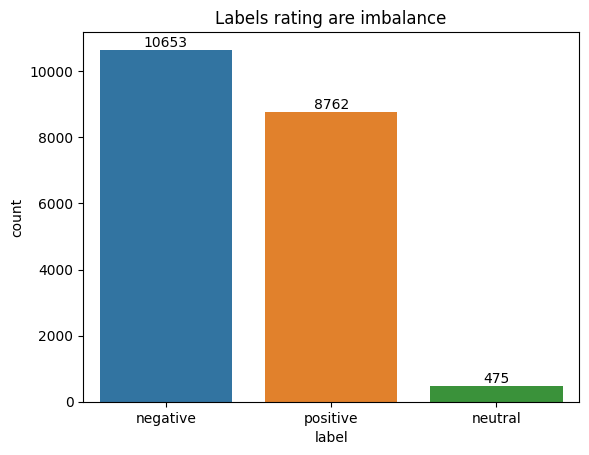

In [181]:
# plot
ax= sns.countplot(x=dataset['label'],
                  data=dataset)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Labels rating are imbalance")
plt.show()

> make resample method between classes

In [182]:
from sklearn.utils import shuffle, resample

# Let's copy our dataframe so that we can use it clean for the upsampling example later.
df2 = dataset

# Let's seperate our data into two based on the Score (True of False). 
df_negative = df2[df2['label'] == 'negative']
df_neutral = df2[df2['label'] == 'neutral']
df_positive = df2[df2['label'] == 'positive']

# Let's use the resample function for upsampling for the Neutral class
df_neutral = resample(df_neutral, replace=True, n_samples=len(df_negative))

# Let's use the resample function for upsampling for the Positive class
df_positive = resample(df_positive, replace=True, n_samples=len(df_negative))

# Let's put the separated data frames together. 
df2 = pd.concat([df_negative, df_neutral, df_positive], axis=0)

# Let's shuffle the data
dataset = shuffle(df2)

print("Number of records after upsampling: ")
print("Positive:", len(dataset[dataset["label"] == 'positive']), 
      "\nNeutral:", len(dataset[dataset["label"] == 'neutral']), 
      "\nNegative:", len(dataset[dataset["label"] == 'negative']))

Number of records after upsampling: 
Positive: 10653 
Neutral: 10653 
Negative: 10653


> show balance using resample method between classes

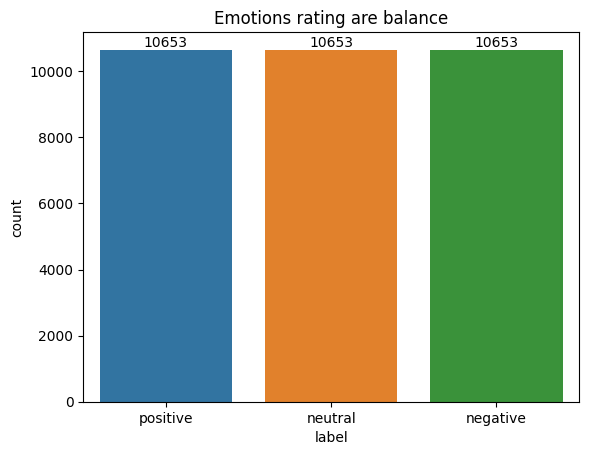

In [183]:
# plot
ax= sns.countplot(x=dataset['label'],
                  data=dataset)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Emotions rating are balance")
plt.show()

> Replace labels with integer numbers using replace method or map method with same way

    + convert negative to -1, neutral to 0 and positive to 1

In [184]:
dataset['label_num'] = dataset['label'].replace({'negative': -1,'neutral':0, 'positive':1}).astype(int)
dataset.sample(10)

,text,emotion,label,label_num
19721,I'm listening to some calming music and feelin...,neutral,neutral,0
3247,I don't want to feel angry anymore,disgusted,negative,-1
19467,im not the one who feel bothered about this,angry,negative,-1
11969,i have a feeling i took so much time but kuya ...,love,positive,1
10651,i sooooo understand feeling like an ugly brown...,sad,negative,-1
7098,i mean its beginning marks the end to one of t...,sad,negative,-1
19654,I donated clothes to charity today.,neutral,neutral,0
19240,i am not feeling the love towards myself and t...,angry,negative,-1
3371,i feel so proud,happy,positive,1
11460,i and will be pleasantly surprised and vote he...,happy,positive,1


### Number of characters in a text

In [185]:
dataset['no_chars'] = dataset['text'].apply(len)
dataset.sample(10)

,text,emotion,label,label_num,no_chars
5452,the time when my sister had her first baby i w...,happy,positive,1,138
4379,i never feel like i have it perfect sometimes ...,happy,positive,1,211
7558,i can stop feeling jealous,angry,negative,-1,26
19614,I emailed a friend earlier today.,neutral,neutral,0,33
3907,i feel utterly devastated that she must go thr...,sad,negative,-1,71
6190,i feel so relaxed amp light since i emptied my...,happy,positive,1,100
13300,I don't want anyone to know I'm neutral,neutral,neutral,0,39
10237,Feeling excited is the worst,neutral,neutral,0,28
19787,This new TV show I'm watching is very entertai...,neutral,neutral,0,64
12125,i really feel unhappy,sad,negative,-1,21


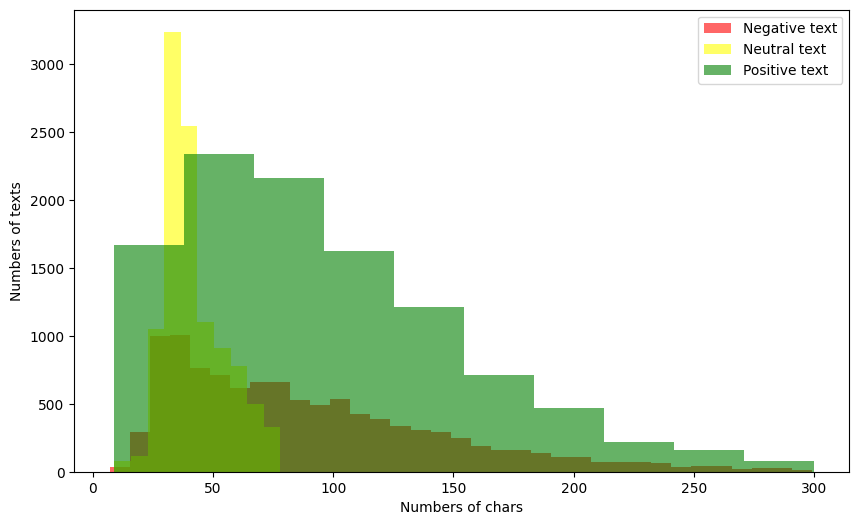

In [186]:
plt.figure(figsize=(10, 6)) 

dataset[dataset['label_num'] == -1]['no_chars'].plot(bins=35, 
                                                            kind='hist', 
                                                            color='red', 
                                                            label='Negative text', 
                                                            alpha=0.6)

dataset[dataset['label_num'] == 0]['no_chars'].plot(kind='hist', 
                                                                color='yellow', 
                                                                label='Neutral text', 
                                                                alpha=0.6)

dataset[dataset['label_num'] == 1]['no_chars'].plot(kind='hist', 
                                                                color='green', 
                                                                label='Positive text', 
                                                                alpha=0.6)

plt.legend(loc='upper right')
plt.xlabel("Numbers of chars")
plt.ylabel("Numbers of texts")
plt.show()

> we have range `2500 positive texts` are in range `40 to 70 characters`!

> we have range `3000 neutral texts` are in range `30 to 50 characters`!

> we have range `800 negative texts` are in range `30 to 80 characters`!

> The distribution of both seems to be almost same. `30 t0 60 characters` in a texts are the most common among both.

let's discover `negative` texts

In [187]:
dataset[dataset['label_num'] == -1].describe()

,label_num,no_chars
count,10653.0,10653.000000
mean,-1.0,89.875810
std,0.0,56.481257
min,-1.0,7.000000
25%,-1.0,44.000000
50%,-1.0,76.000000
75%,-1.0,121.000000
max,-1.0,299.000000


> we have `10653 negative texts`, but Woah! `299 characters`, let's use masking to find this text:

In [188]:
max_neg= dataset[dataset['label_num'] == 1]['no_chars'].max()
dataset[dataset['no_chars'] == max_neg]['text'].iloc[0]

'i hope that those of you who actauly found this and read it feel possibly inspired to go out and buy some of these items or even go through storage and see what clothes of yours your mom saved and that you still have a hope of fitting in and mix up your wardrobe for this summer and have a little fun'

let's discover `neutral` texts

In [189]:
dataset[dataset['label_num'] == 0].describe()

,label_num,no_chars
count,10653.0,10653.000000
mean,0.0,41.874214
std,0.0,13.066410
min,0.0,9.000000
25%,0.0,33.000000
50%,0.0,38.000000
75%,0.0,50.000000
max,0.0,78.000000


> we have `10653 positive texts`, but Woah! `78 characters`, let's use masking to find this text:

In [190]:
max_neu= dataset[dataset['label_num'] == 0]['no_chars'].max()
dataset[dataset['no_chars'] == max_neu]['text'].iloc[0]

'im feeling distracted i tend to practice with my eyes shut as much as possible'

let's discover `positive` texts

In [191]:
dataset[dataset['label_num'] == 1].describe()

,label_num,no_chars
count,10653.0,10653.000000
mean,1.0,95.703558
std,0.0,56.764592
min,1.0,9.000000
25%,1.0,50.000000
50%,1.0,85.000000
75%,1.0,129.000000
max,1.0,300.000000


> we have `10653 positive texts`, but Woah! `300 characters`, let's use masking to find this text:

In [192]:
max_pos= dataset[dataset['label_num'] == 1]['no_chars'].max()
dataset[dataset['no_chars'] == max_pos]['text'].iloc[0]

'i hope that those of you who actauly found this and read it feel possibly inspired to go out and buy some of these items or even go through storage and see what clothes of yours your mom saved and that you still have a hope of fitting in and mix up your wardrobe for this summer and have a little fun'

### Number of tokens in a text
> split text to tokens

    - applies the split() method to each element in the 'text' column. 
    - It splits the text into a list of tokens, 

> mapping lambda function 

    - applies the map() method for each token in the text, 
    - it calculates the length of the token using len(i)

> final result 

    - dataset_train['no_tokens']= stores the lengths of the words for each text.

In [193]:
dataset['no_tokens']= dataset['text'].str.split().map(lambda token: len(token)) 
dataset.sample(10)

,text,emotion,label,label_num,no_chars,no_tokens
11538,ive not been back to the doctor in a year and ...,happy,positive,1,66,15
2761,i feel radiant this morning,happy,positive,1,27,5
10359,I find it hard to be fearful in this situation,neutral,neutral,0,46,10
3027,i can feel his impatient and i can t stop my b...,angry,negative,-1,83,17
9190,i feel like it is cool for now but we wonder w...,happy,positive,1,122,25
3630,i now feel a longing for knowledge,love,positive,1,34,7
19691,Brunch with friends was most pleasant.,neutral,neutral,0,38,6
19769,This new album I'm listening to is really good...,neutral,neutral,0,60,11
6757,Feeling surprised is the worst,fear,negative,-1,30,5
18245,i want you to know that if i become prime mini...,happy,positive,1,221,50


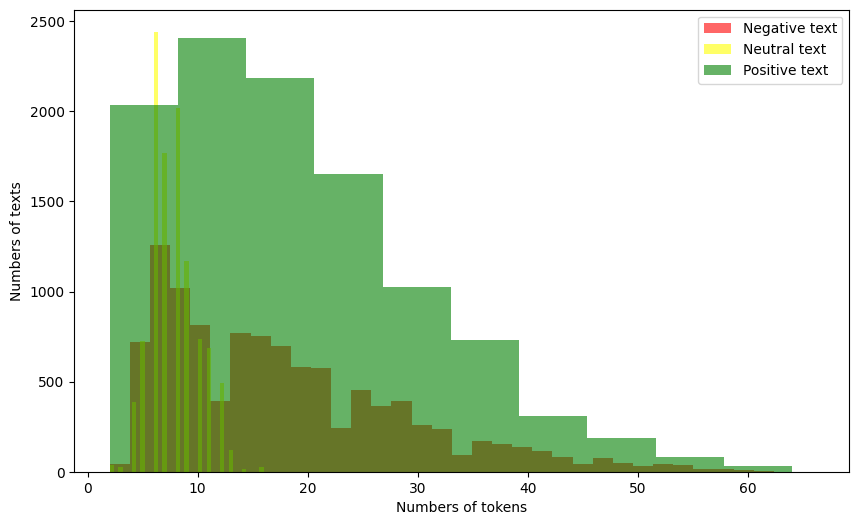

In [194]:
plt.figure(figsize=(10, 6)) 

dataset[dataset['label_num'] == -1]['no_tokens'].plot(bins=35, 
                                                            kind='hist', 
                                                            color='red', 
                                                            label='Negative text', 
                                                            alpha=0.6)

dataset[dataset['label_num'] == 0]['no_tokens'].plot(bins=35, 
                                                            kind='hist', 
                                                            color='yellow', 
                                                            label='Neutral text', 
                                                            alpha=0.6)

dataset[dataset['label_num'] == 1]['no_tokens'].plot(kind='hist', 
                                                                color='green', 
                                                                label='Positive text', 
                                                                alpha=0.6)

plt.legend(loc='upper right')
plt.xlabel("Numbers of tokens")
plt.ylabel("Numbers of texts")
plt.show()

The distribution of both seems to be almost same. `5 t0 20 tokens` in a texts are the most common among both.

### Average token length in a text
> split text to tokens

    - applies the split() method to each element in the 'text' column. 
    - It splits the text into a list of tokens, 

> mapping lambda function for each token in the text, 

    - it calculates the length of the token using len(i)
    - The resulting lengths are stored as a list for each text.

> final result 

    - dataset_train['avg_tokens']= stores the average of the words for each text.

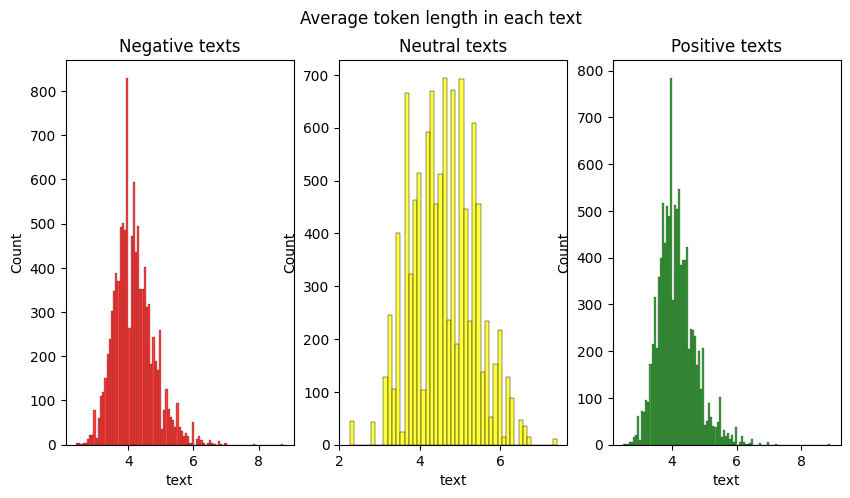

In [195]:
fig,(ax1, ax2, ax3)=plt.subplots(1,3,figsize=(10,5))

avg_tokens= dataset[dataset['label_num'] == -1]['text'].str.split().apply(lambda token : [len(char) for char in token]).map(lambda x: np.mean(x))
sns.histplot(avg_tokens, ax=ax1, color='red')
ax1.set_title('Negative texts')

avg_tokens= dataset[dataset['label_num'] == 0]['text'].str.split().apply(lambda token : [len(char) for char in token]).map(lambda x: np.mean(x))
sns.histplot(avg_tokens, ax=ax2, color='yellow')
ax2.set_title('Neutral texts')

avg_tokens= dataset[dataset['label_num'] == 1]['text'].str.split().apply(lambda token : [len(char) for char in token]).map(lambda x: np.mean(x))
sns.histplot(avg_tokens, ax=ax3, color='green')
ax3.set_title('Positive texts')

fig.suptitle('Average token length in each text')
plt.show()

The distribution of both seems to be almost same. `4 tokens` in a texts are the most common among both.

# 📑 _Part 2 - Data preprocessing_

> In this section we'll convert the raw text (sequence of characters) into vectors (sequences of numbers).

> First step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the `NLTK` library.


**Noise Removal**


In [196]:
import nltk
from nltk.corpus import stopwords

**show stop words list**


In [197]:
# nltk.download('stopwords')
stop_words= stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Excluding some useful words from stop words list**|


In [198]:
excluding= ['againts','no' ,'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', 
            "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn', 
            "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't", 
            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stop_words= [word for word in stop_words if word not in excluding]
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

- **split text to tokens using word_tokenize**

  - function is used to split the input text into individual words and return list of strings


In [199]:
from nltk.tokenize import word_tokenize
# nltk.download('punkt') 

- **word normalization**

  - `PorterStemmer`: remove common word `endings` and suffixes, but the resulting stems may not always be actual words.

  - `WordNetLemmatizer`: get `root form` of word in their dictionary definitions.


In [200]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
stemmer= PorterStemmer()    
lemmatizer = WordNetLemmatizer()

In [201]:
def preprocessing_dataset(texts):
    cleaned_texts = []  # list to include the cleaned text in.

    for sent in texts: # loop on each sentence
        filtered_sent= []
        tokens= word_tokenize(sent.lower())
        
        for token in tokens: # loop on each token from sentence
            # check if it's not numeric and its length > 2 and not in stop words
            if (not token.isnumeric()) and (len(token) > 2) and (token not in stop_words):
                filtered_sent.append(stemmer.stem(token) and lemmatizer.lemmatize(token))
                
        # convert tokens to text
        text= " ".join(filtered_sent) # string of cleaned words 
        cleaned_texts.append(text)
    
    return cleaned_texts

**dataset train**


In [202]:
# cleaning the training text
dataset['clean_text'] = preprocessing_dataset(dataset['text'].values)
dataset.sample(10)

,text,emotion,label,label_num,no_chars,no_tokens,clean_text
11680,i feel such an attachment to cindy her sweet f...,happy,positive,1,63,12,feel attachment cindy sweet family atticus
4184,im happy there are people in this world that h...,happy,positive,1,220,41,happy people world untouched mental health iss...
18848,i feel there is no excuse for lame invitations,sad,negative,-1,46,9,feel excuse lame invitation
14851,i feel to be the most hated myself in this world,sad,negative,-1,48,11,feel hated world
19747,The park is a great place to get some exercise...,neutral,neutral,0,61,13,park great place get exercise fresh air
4268,im getting things done that i really need to a...,happy,positive,1,69,15,getting thing done really need feel good
6072,i feel so impatient and sometimes i feel thank...,angry,negative,-1,105,21,feel impatient sometimes feel thankful god gav...
2523,i had a secretary called fran who had landed f...,sad,negative,-1,191,38,secretary called fran landed dublin whim much ...
19800,I'mfeeling content with my current level of pr...,neutral,neutral,0,57,8,i'mfeeling content current level productivity
659,i feel more than honoured to be part of this s...,happy,positive,1,134,25,feel honoured part series join wonderful talen...


> split dataset to train and test

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X = dataset['clean_text']
y = dataset['label_num']

In [205]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.15, shuffle=True)

In [206]:
print(f"X_train is {X_train.shape}")
print(f"X_test is {X_test.shape}")
print(f"y_train is {y_train.shape}")
print(f"y_test is {y_test.shape}")

X_train is (27165,)
X_test is (4794,)
y_train is (27165,)
y_test is (4794,)


> we split dataset to `85% for traning` and `15% for testing`.



# 🧮 Part 3 - Build Pipline

> Build the pipeline

  - makes it easier to `train` and `evaluate` the model

  - which allows you to `reuse same preprocessing`

  - `reuse same modeling` steps on new data

  - `without retrain` the preprocessing steps


In [207]:
from sklearn.pipeline import Pipeline

> Term Frequency Inverse Document Frequency (TFIDF)

  - We can perform `feature extraction` using the `TfidfVectorizer` class from the scikit-learn library.

  - gives less importance to common words and more importance to rare words that appear in a few documents.


In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

> Naive bayes classifier

  + we can perform `traning` for model using `Naive bayes classifier` which is fast and simple.


In [209]:
from sklearn.naive_bayes import MultinomialNB

**define pipeline with the TfidfVectorizer and Naive Bayes classifier**


In [210]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

> randomized search

  + help improve the model's performance by finding the `best hyperparameters` for the TFIDF and Naive Bayes.


In [211]:
from sklearn.model_selection import RandomizedSearchCV

**define new parameters with different values to get the best hyperparameters**


In [212]:
params = {
    # determines the range of n-grams to be used for tokenization.
    # (1, 2) consider unigrams and bigrams
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    # minimum document frequency of a term in the corpus
    # increasing the value of "max_df" to exclude terms that appear too frequently in the corpus.
    'tfidf__max_df': [0.5, 0.75, 1.0],
    # maximum document frequency of a term in the corpus
    # decreasing the value of "min_df" to allow more terms to be included,
    'tfidf__min_df': [1, 2, 3],
    'nb__alpha': [0.1, 0.5, 1.0]
}

**define randomized search**


In [213]:
random_search = RandomizedSearchCV(pipeline,
                                   param_distributions=params,  # parameters grid  
                                   n_iter=25,   # number of iteration
                                   # 10 > 82%
                                   # 15 > 85%
                                   # 20 > 87%
                                   # 25 > 93%
                                   cv=5)    # Cross-validation to evaluate the model's performance


**fit randomized search on training data and labels.**


In [214]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('nb', MultinomialNB())]),
                   n_iter=25,
                   param_distributions={'nb__alpha': [0.1, 0.5, 1.0],
                                        'tfidf__max_df': [0.5, 0.75, 1.0],
                                        'tfidf__min_df': [1, 2, 3],
                                        'tfidf__ngram_range': [(1, 1), (1, 2),
                                                               (2, 2)]})

- **params for number of iteration**


In [215]:
pd.DataFrame(random_search.cv_results_)[["params"]]

,params
0,"{'tfidf__ngram_range': (2, 2), 'tfidf__min_df'..."
1,"{'tfidf__ngram_range': (1, 1), 'tfidf__min_df'..."
2,"{'tfidf__ngram_range': (1, 1), 'tfidf__min_df'..."
3,"{'tfidf__ngram_range': (2, 2), 'tfidf__min_df'..."
4,"{'tfidf__ngram_range': (1, 1), 'tfidf__min_df'..."
5,"{'tfidf__ngram_range': (2, 2), 'tfidf__min_df'..."
6,"{'tfidf__ngram_range': (2, 2), 'tfidf__min_df'..."
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__min_df'..."
8,"{'tfidf__ngram_range': (1, 2), 'tfidf__min_df'..."
9,"{'tfidf__ngram_range': (1, 1), 'tfidf__min_df'..."


- **best hyperparameters and score**

  - by the random search object can be accessed using:

  - the best*params* attribute

  - The best*score* attribute


In [216]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {round(random_search.best_score_*100)}%")

Best parameters: {'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 1, 'tfidf__max_df': 0.5, 'nb__alpha': 1.0}
Best score: 92%


# 🤖 Part 4 - Traning machine learning model

- we can train the Naive Bayes model on the training data and labels
  using the pipeline with the best hyperparameters.


In [217]:
best_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=random_search.best_params_['tfidf__ngram_range'], 
                              max_df=random_search.best_params_['tfidf__max_df'], 
                              min_df=random_search.best_params_['tfidf__min_df'])),
    ('nb', MultinomialNB(alpha=random_search.best_params_['nb__alpha']))
])

best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

# Part 5 - Evaluation


In [218]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

**make predictions on test data using the trained model**


In [219]:
y_pred = best_pipeline.predict(X_test)

**accuracy score**


In [220]:
# compute accuracy score with y-test and y-predictions
# number of correct predictions divided by the total number of predictions.

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100)}%")

Accuracy: 93%


- **classification_report**

  - helps evalute the performance of a classification model by providing metrics such as

  - **precision**: calculated as the ratio of true positive predictions to the total predicted positive and avoid false positives.

  - **recall**: calculated as the ratio of true positive predictions to the total predicted positive and avoid false negatives

  - **F1-score**: harmonic mean of precision and recall

  - **support**: number of samples in class


In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.88      0.93      1598
           0       0.87      1.00      0.93      1583
           1       0.95      0.92      0.93      1613

    accuracy                           0.93      4794
   macro avg       0.94      0.93      0.93      4794
weighted avg       0.94      0.93      0.93      4794



- **Confusion matrix** Table that shows the

  - true positive - true negative

  - false positive - false negative

  - values to predict actual values and create heatmap


In [222]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1399  127   72]
 [   0 1583    0]
 [  26  110 1477]]


# Part 6 - Visualization


**Heatmap of the confusion matrix**


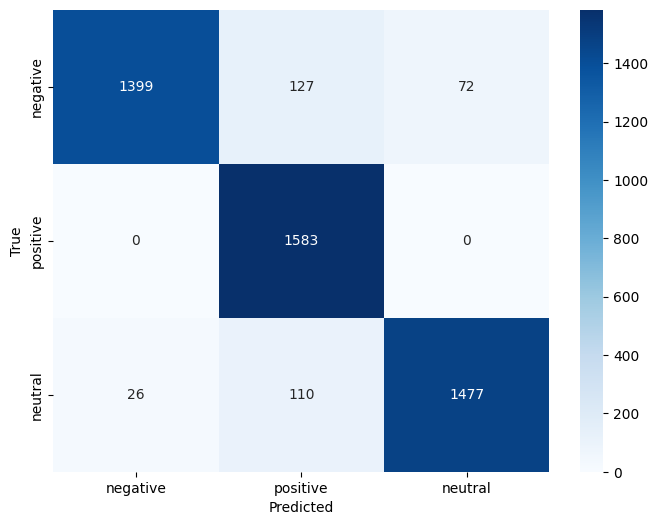

In [223]:
plt.figure(figsize = (8,6))
sns.heatmap(cm, 
            xticklabels=labels, 
            yticklabels=labels, 
            annot=True, 
            cmap='Blues', 
            fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print message text for false positives


In [224]:
# X_test[(y_pred_class == 1) & (y_test == 0)]
print(f"False Positive= {len(pd.DataFrame(X_test[y_pred > y_test]))}")
pd.DataFrame(X_test[y_pred > y_test])

False Positive= 199


,clean_text
12820,try explain feel order don think ungrateful bl...
6376,n't find joy disgusted
1657,feel answer completely sarcastic way
10517,'ve enough feeling surprised
10486,n't stand surprised anymore
...,...
16965,feel like would confused waited long time read...
6396,trying not neutral
13464,n't find joy fearful
17194,know core perception doesnt shift matter many ...


print message text for true negative


In [225]:
# X_test[(y_pred_class == 0) & (y_test == 1)]
print(f"True Negative= {len(pd.DataFrame(X_test[y_pred < y_test]))}")
pd.DataFrame(X_test[y_pred < y_test])

True Negative= 136


,clean_text
2182,feeling really
8503,feel absolutely elegant white coat cheaper ver...
8682,could feel pulled evil vampire wanted suck pit...
6649,dislike feeling surprised
6436,disgusted make feel terrible
...,...
6601,absolutely not happy
8007,still couldnt believe much pain not feel happy...
3244,wish n't feel surprised time
1282,feel surprised didnt expect


# Part 7 - Save the pipline

- joblib
  - to reuse the same preprocessing steps and classifier on new data
  - without having to redefine them each time.


In [226]:
import joblib
joblib.dump(best_pipeline,r'models/pipeline_tfidf_nb_30_may_2023.pkl') 

['models/pipeline_tfidf_nb_30_may_2023.pkl']

# Part 8 - Build GUI

In [ ]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Load the pre-trained model
model = joblib.load('../models/pipeline_tfidf_nb_30_may_2023.pkl')

# Function to preprocess the input text
def preprocess_text(text):
    # Load stopwords and define stemmer and lemmatizer
    stop_words = stopwords.words("english")
    excluding = ['againts', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn',
                "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't",
                'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    stop_words = [word for word in stop_words if word not in excluding]

    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    cleaned_text = []
    tokens = word_tokenize(text.lower())
    
    for token in tokens:
        if (not token.isnumeric()) and (len(token) > 2) and (token not in stop_words):
            cleaned_text.append(stemmer.stem(token) and lemmatizer.lemmatize(token))
            
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

# Function to predict the sentiment and probability
def predict_sentiment(text):
    preprocessed_text = preprocess_text(text)
    prediction = model.predict([preprocessed_text])
    probability = model.predict_proba([preprocessed_text])[0]
    return prediction, probability

# Define the main function for the Streamlit app
def main():
    # Set Streamlit app title and layout
    st.set_page_config(page_title="Sentiment Analysis", layout="centered")

    # Title and description
    st.title("Sentiment Analysis")
    st.write("Enter a sentence to predict its sentiment.")

    # Text input
    text_input = st.text_input("Enter a text:")
    prediction_button = st.button("Predict")

    # Perform prediction when button is clicked
    if prediction_button:
        st.subheader("Text:")
        st.write(text_input)
        prediction, probability = predict_sentiment(text_input)
        st.subheader("Prediction:")
        if prediction == 1:
            st.write("Positive: 😂")
        elif prediction == 0:
            st.write("Neutral: 😐")
        else:
            st.write("Negative: 😔")
        st.subheader("Probability:")
        st.write(f"Probability of Sad: {probability[0]:.2f}")
        st.write(f"Probability of Neutral: {probability[1]:.2f}")
        st.write(f"Probability of Happy: {probability[2]:.2f}")

        # Plot countplot for probability
        data = {"Probability": ['Sad' , 'Neutral', 'Happy'], "Value": probability}
        df = pd.DataFrame(data)
        fig, ax = plt.subplots()
        sns.barplot(x="Probability", y="Value", data=df)
        ax.set_title("Probability")
        
        # Add annotations to the bars
        for p in ax.patches:
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(f'{y:.2f}', (x, y), ha='center', va='bottom')
        
        st.pyplot(fig)

if __name__ == '__main__':
    main()